# MATH 441 Discrete Optimization Problems

## October 4, 2022

* Project Description
* Project Proposal Outline
* Getting Started
* Simplest Example

## Project Description

**Optimal Transport for Image Recognition**

Optimal transport is a special kind of network flow where we have source nodes and target nodes (and the network flows from sources to targets only). The goal of optimal transport is to find the minimum cost to move mass from source nodes to target nodes. We can represent an image as a matrix of pixels with color intensity. Define the similarity of a source image to a target image by the cost to move the color from pixels of the source to the target. Develop an image recognition algorithm using optimal transport as a measure of similarity.

## Project Proposal Outline

* Clearly state the problem to be solved or question(s) to be answered
* Identify data to collect and computations to perform
* List relevant references and examples
* Submit LaTeX document (at most 1 page)

##  Getting Started

It's difficult to know where to start when considering a new problem. The best place to start is to clearly articulate very simple questions based on the high-level description of the problem. Researching, describing and documenting these questions should get us started writing the problem statement.

### Questions

* What is optimal transport (OT)? How is OT related to network flows?
* How do we formulate a general OT problem as a linear programming problem?
* What is the objective function in an OT problem? What are the constraints?
* What is the simplest example of OT? How can we solve a simple example and visualize it?
* How can we relate simple OT examples to images?
* What are the costs and constraints for transporting color from pixel to pixel?
* What simple algorithms already exist to compare images?
* How do you measure the efficiency of image recognition algorithms?
* What dataset can we use to test our algorithm?

### Basic Theory

Optimal transport is the basis for our problem and so we should find the simplest description of it and formulate a simple, explicit example that we can solve. [Discrete Optimal Transport (by Rémi Flamary)](https://remi.flamary.com/demos/transport.html) is the simplest resource I could find online. Let's try to formulate the simplest nontrivial example:

* Discrete optimal transport is a special kind of transportation problem
* There are source nodes and targets nodes each with a certain mass
* Let $\mathbf{s}_1,\dots,\mathbf{s}_{n_s} \in \mathbf{R}^2$ be a collection of $n_s$ source nodes in 2D
* Let $m_{\mathbf{s}_1},\dots,m_{\mathbf{s}_{n_s}}$ be the masses of the source nodes
* The total mass of source nodes is $\sum_{i=1}^{n_s} m_{\mathbf{s}_i} = 1$
* Let $\mathbf{t}_1,\dots,\mathbf{t}_{n_t} \in \mathbf{R}^2$ be a collection of $n_t$ target nodes in 2D
* Let $m_{\mathbf{t}_1},\dots,m_{\mathbf{t}_{n_t}}$ be the masses of the target nodes
* The total mass of target nodes is $\sum_{j=1}^{n_t} m_{\mathbf{t}_j} = 1$
* Let $c_{ij}$ be the cost to move one unit of mass from source node $\mathbf{s}_i$ to target node $\mathbf{t}_j$
* The simplest way to define the cost is by the distance between source and target nodes
* The cost matrix $C = [c_{ij}]$ has size $n_s \times n_t$
* Let $X = [x_{ij}]$ be the optimal transport matrix where $x_{ij}$ is the flow from source node $i$ to target node $j$
* The optimal transport matrix $X = [x_{ij}]$ has size $n_s \times n_t$
* The constraints are determined by the network flow balance equations:
  * total mass flow from source node $\mathbf{s}_k$ is $m_{\mathbf{s}_k}$ therefore $\sum_{j=1}^{n_t} x_{k,j} = m_{\mathbf{s}_k}$ 
  * total mass flow to target node $\mathbf{t}_l$ is $m_{\mathbf{t}_l}$ therefore $\sum_{i=1}^{n_s} x_{i,l} = m_{\mathbf{t}_l}$
* The balance equations determine equality constraint equations $A \mathbf{x} = \mathbf{b}$  
* The constraints are $A \mathbf{x} = \mathbf{b}$ where $A$ is size $(n_s + n_t) \times n_s n_t$ and $\mathbf{x}$ is the flatten optimal transport matrix $X$
* The goal of discrete optimal transport is to find the minimum cost to move the total mass of a distribution of source nodes to a given distribition of target nodes

## Simplest Example

Let's try to construct the simplest example of OT. Consider 3 sources nodes located at $(0,1)$, $(1,0)$ and $(1,1)$ each with mass $1/3$, and 2 targets nodes located at $(2,2)$ and $(3,2)$ with masses $3/4$ and $1/4$ respectively.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.optimize import linprog

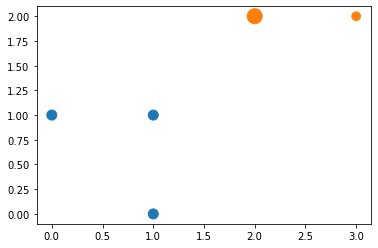

In [2]:
sources = np.array([(0,1,1/3),(1,0,1/3),(1,1,1/3)])
targets = np.array([(2,2,3/4),(3,2,1/4)])
plt.scatter(sources[:,0],sources[:,1],s=300*sources[:,2])
plt.scatter(targets[:,0],targets[:,1],s=300*targets[:,2])
plt.show()

Construct the cost matrix by computing the distance from source node $i$ to target node $j$ for each $i,j$.

In [3]:
ns = sources.shape[0]
nt = targets.shape[0]
C = np.zeros((ns,nt))
for i in range(0,ns):
    for j in range(0,nt):
        C[i,j] = la.norm(sources[i,[0,1]] - targets[j,[0,1]])

In [4]:
C

array([[2.23606798, 3.16227766],
       [2.23606798, 2.82842712],
       [1.41421356, 2.23606798]])

The optimal transport matrix $X$ has size 6 and the flattened matrix $X$ is the vector:

$$
\mathbf{x} = \begin{bmatrix} x_{0,0} \\ x_{0,1} \\ x_{1,0} \\ x_{1,1} \\ x_{2,0} \\ x_{2,1} \end{bmatrix}
$$

Let's determine the constraint equation $A\mathbf{x} = \mathbf{b}$ from the balance equations and masses.

In [5]:
A = np.array([[1,1,0,0,0,0],[0,0,1,1,0,0],[0,0,0,0,1,1],[1,0,1,0,1,0],[0,1,0,1,0,1]])
b = np.array([1/3,1/3,1/3,3/4,1/4])

Compute the optimal transport:

In [6]:
solution = linprog(C.flatten(),A_eq=A[1:],b_eq=b[1:])
solution

     con: array([-5.59255420e-11, -5.59259306e-11, -7.54994955e-11, -9.22779075e-11])
     fun: 2.1102062930226184
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([3.33333333e-01, 9.39146987e-11, 8.33333334e-02, 2.50000000e-01,
       3.33333333e-01, 2.14077239e-11])

Visualize the result:

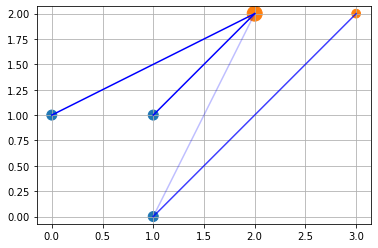

In [8]:
plt.scatter(sources[:,0],sources[:,1],s=300*sources[:,2])
plt.scatter(targets[:,0],targets[:,1],s=300*targets[:,2])

flow = solution.x.reshape((ns,nt))
for i in range(0,ns):
    for j in range(0,nt):
        if np.round(flow[i,j],2) > 0:
            plt.plot([sources[i,0],targets[j,0]],[sources[i,1],targets[j,1]],'b',alpha=flow[i,j]/np.max(flow))

plt.axis("equal"), plt.grid(True)
plt.show()